# Time of Flight

Compute the time of flight from the inlet/outlet. The underlying workhorse uses the ``marching_map()`` function from [``PoreSpy``](https://porespy.org/index.html).

___

## Import packages

In [1]:
import dpm_tools as dpm
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt

[15:58:59] ERROR    PARDISO solver not installed, run `pip install pypardiso`. Otherwise,          ]8;id=879447;file://C:\Users\bcc2459\AppData\Roaming\Python\Python312\site-packages\openpnm\utils\_workspace.py\_workspace.py]8;;\:]8;id=228618;file://C:\Users\bcc2459\AppData\Roaming\Python\Python312\site-packages\openpnm\utils\_workspace.py#56\56]8;;\
                    simulations will be slow. Apple M chips not supported.                                         

## Demonstration image

To demonstrate the distance transforms, we generate a simple 3D binary image using the [PoreSpy blobs generator](https://porespy.org/examples/generators/tutorials/making_blobs.html) function. The example image size is $100 \times 100 \times 100$.

(-0.5, 99.5, 99.5, -0.5)

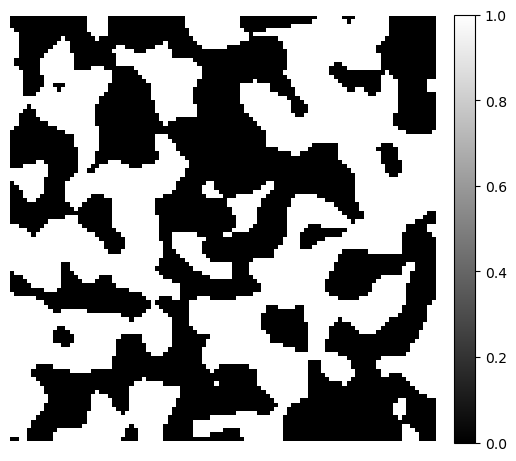

In [4]:
image = ps.generators.blobs(shape=[100, 100, 100])

fig, ax = plt.subplots(figsize=[6, 6])
im = ax.imshow(image[1], cmap="binary_r")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax.axis(False)

## Time of Flight

The time of flight (ToF) is computed as the solution to the Eikonal equation, 

$$ |\nabla T(x)| = \frac{1}{|v(x)|}, $$

where $T(x)$ is the time of flight to point $x$ and $v(x)$ is the stead-state velocity field. 

The equation describes a wavefront moving with speed $|v(x)|$ and results in the first arrival time of the front to location $x$. For pore scale characterization, the ToF map helps to visualize flow paths and quantify connectivity and tortuosity. Numerically, the solution is obtained using the Fast Marching Method.

The ``tof`` function in the ``dpm_tools.metrics`` module expects a 2D or 3D ``np.ndarray`` where the phase of interest (foreground) is labeled as 1. The function computes the time of flight from the left or right faces (denoted by *'l'* or *'r'*). It also "detrends" the result by default, meaning it subtracts away the underlying solution assuming no solid matrix is present in the image.


(-0.5, 99.5, 99.5, -0.5)

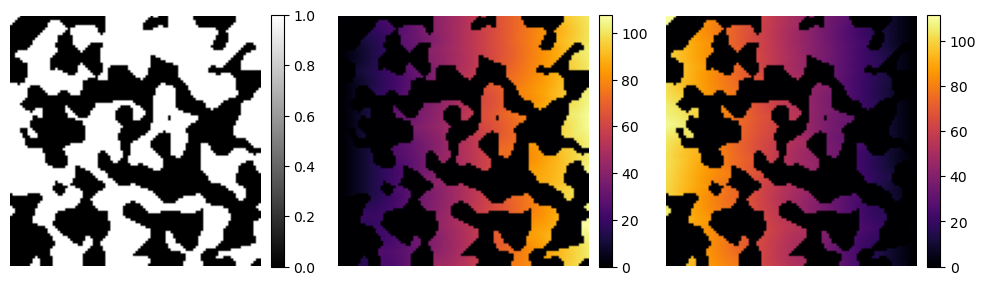

In [5]:
image_tofl = dpm.metrics.time_of_flight(image, 'l', detrend=False)
image_tofr = dpm.metrics.time_of_flight(image, 'r', detrend=False)

fig, ax = plt.subplots(1, 3, figsize=[12, 6])

im = ax[0].imshow(image[50], cmap="binary_r")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax[0].axis(False)

im = ax[1].imshow(image_tofl[50], cmap="inferno")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax[1].axis(False)

im = ax[2].imshow(image_tofr[50], cmap="inferno")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax[2].axis(False)